In [2]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
import os


In [19]:
data_dir="./data/train/"

In [20]:
types=os.listdir(data_dir)
print(types)

['no_tumor', 'tumor']


In [21]:
import imageio


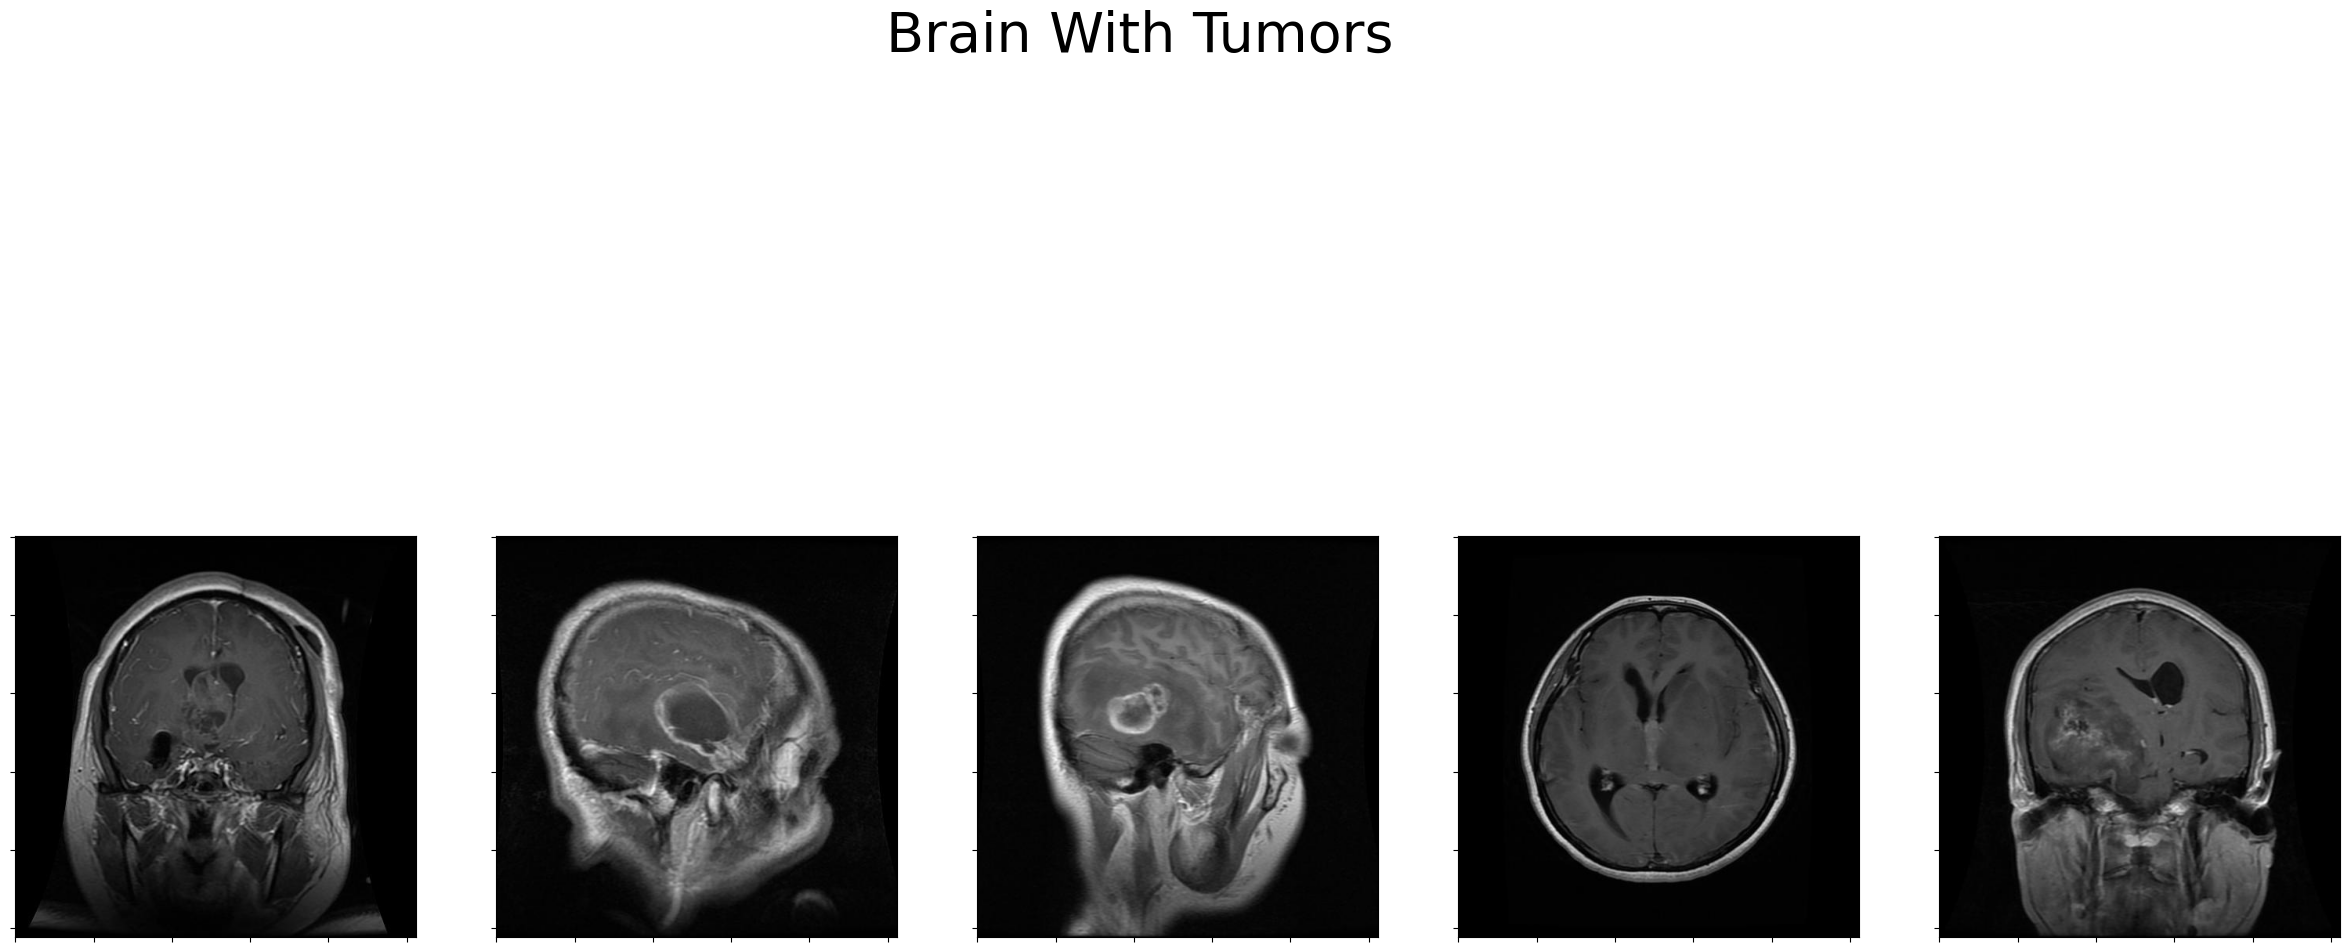

In [26]:
#visualizing some images of brain with tumors
fig,ax=plt.subplots(1,5,figsize=(30,15))
for i in range(5):
    img=os.listdir(os.path.join(data_dir,types[1]))[i]
    img_=os.path.join(data_dir,types[1],img)
    image=imageio.imread(img_)
    ax[i].imshow(image)
    fig.suptitle("Brain With Tumors", fontsize=40)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

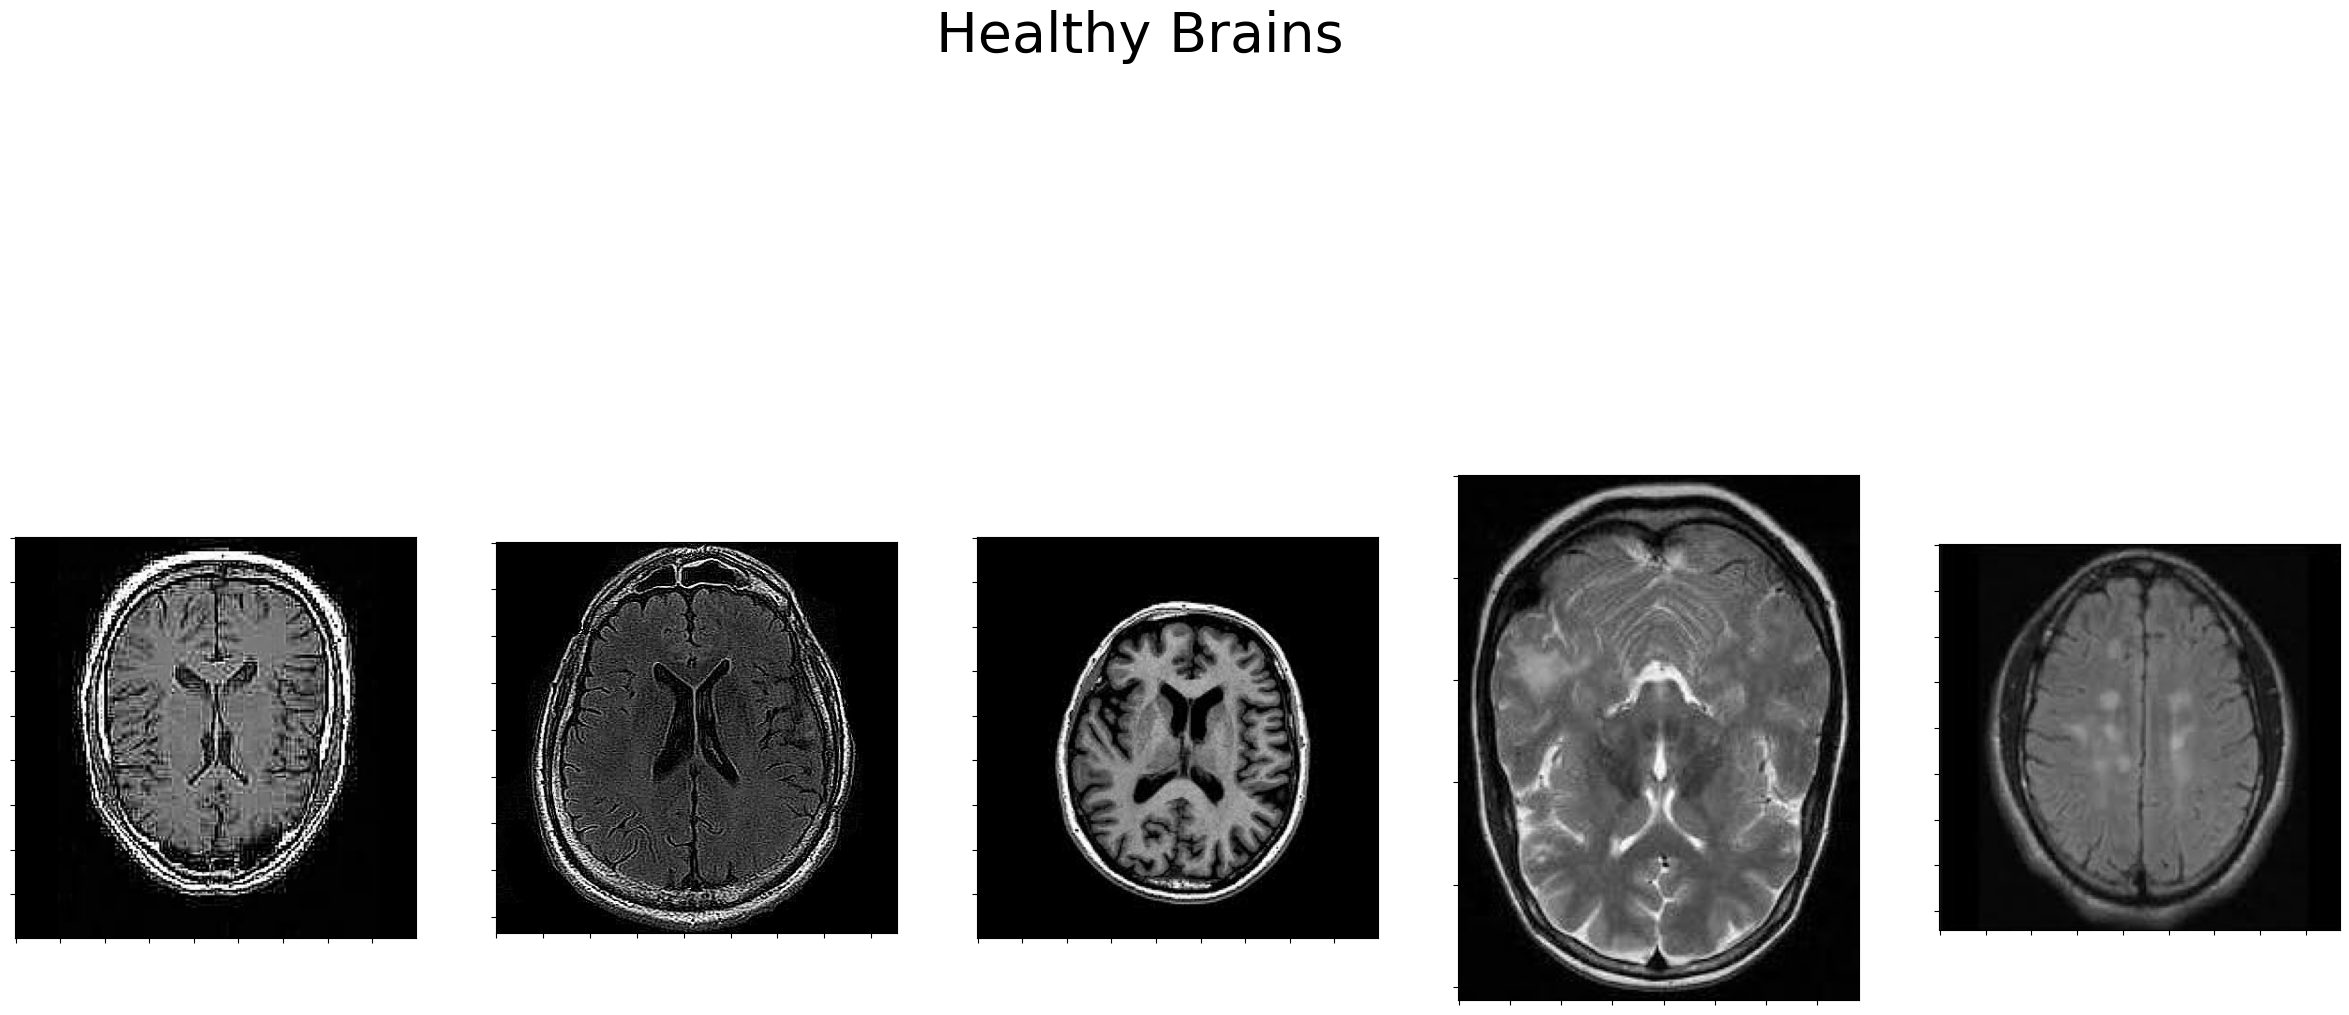

In [28]:
#images corresponding to healthy brains
fig,ax=plt.subplots(1,5,figsize=(30,15))
for i in range(5):
    img=os.listdir(os.path.join(data_dir,types[0]))[i]
    img_=os.path.join(data_dir,types[0],img)
    image=imageio.imread(img_)
    ax[i].imshow(image)
    fig.suptitle("Healthy Brains", fontsize=40)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

    

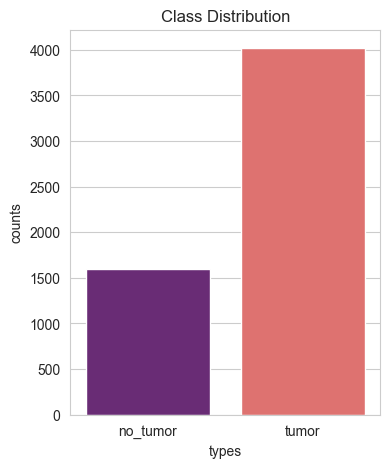

In [33]:
arr_counts=[len(os.listdir(os.path.join(data_dir,types[i]))) for i in range(len(types))]
data={'types':types,'counts':arr_counts}
df=pd.DataFrame(data)
sns.set_style("whitegrid")
plt.figure(figsize=(4,5))
sns.barplot(x='types',y='counts',data=df,palette='magma')
plt.xticks(rotation=0)
plt.title('Class Distribution')
plt.show()

In [34]:
img_size=224
batch_size=32

In [41]:
# 1. Rules for TRAINING (Includes Augmentation to fix your imbalance)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
    # NO validation_split here!
)

# 2. Rules for VALIDATION (Only Rescale, no messing with the images)
val_datagen = ImageDataGenerator(rescale=1./255)

# 3. Create the Training Conveyor Belt
train_generator = train_datagen.flow_from_directory(
    "./data/train/",        # Pointing to your train folder
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# 4. Create the Validation Conveyor Belt
val_generator = val_datagen.flow_from_directory(
    "./data/validation/",   # Pointing to your validation folder
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False           # Keep False so you can easily compare results later
)

Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.


In [45]:
# initialize the CNN
model= Sequential()
# Convolution
model.add(Conv2D(64,(3,3),padding='same',input_shape=(img_size,img_size,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 2nd convolution layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# 3rd convolution layer 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# flattening
model.add(Flatten())
# fully connected layer 1 layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
# fully connected layer 2nd layer 
model.add(Dense(2,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

opt=Adam(learning_rate=0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 128)  │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 56, 56, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │   205,521,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │             

 Total params: 206,324,360 (787.06 MB)

 Trainable params: 206,321,928 (787.06 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [ ]:
epochs = 30

# Use .n (total samples) and .batch_size from the generators themselves
steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size

# Fixed spelling of 'monitor'
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=2, 
    min_lr=0.00001, 
    mode='auto'
)

# Fixed spelling of 'monitor'
checkpoint = ModelCheckpoint(
    'model_weights.weights.h5', 
    monitor='val_accuracy', 
    save_weights_only=True, 
    mode='max', 
    verbose=1
)

callbacks = [checkpoint, reduce_lr]

# Training process
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_steps,
    callbacks=callbacks
)

Epoch 1/30
